# ANÁLISIS EXPLORATORIO DE DATOS (EDA)

- METADATA-SITIOS

In [31]:
import ast
import json
import pandas as pd
import numpy as np
import jsonlines
import matplotlib as plt
import matplotlib.pyplot as plt
import os
import gc

Carga del dataframe

In [2]:
data = []

with jsonlines.open(r"E:\Repositorios y bases de datos\Henry DS\_PROYECTO FINAL\material PF\Google Maps\metadata-sitios\2.json") as reader:
    for obj in reader:
        data.append(obj)

df = pd.DataFrame(data)
df

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,Glik's,"Glik's, 1405 W Main St, Gaylord, MI 49735",0x4d354f7b3ae7bef1:0x8d9fdcd2fd71eb10,Family-owned clothing chain offering trendy ca...,45.025578,-84.702644,"[Clothing store, Shoe store, Women's clothing ...",4.4,16,None,"[[Saturday, 10AM–8PM], [Sunday, 12–5PM], [Mond...","{'Service options': ['In-store pickup', 'In-st...",Open ⋅ Closes 8PM,"[0x4d3545876def64d9:0x9ce5f21fc27974d6, 0x4d35...",https://www.google.com/maps/place//data=!4m2!3...
2,Oscoda County Area Transit Authority (O-cats),"Oscoda County Area Transit Authority (O-cats),...",0x88208ef3441c45bb:0x8dd64d99a31de703,None,44.645621,-84.149766,[Handicapped transportation service],4.7,6,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x88208ef38622eed1:0xc6f564f43dcbeb30, 0x8820...",https://www.google.com/maps/place//data=!4m2!3...
3,Hickerson Floor & Tile Haus,"Hickerson Floor & Tile Haus, 2234 M-32, Gaylor...",0x4d35487e8d000561:0xdb6871623dbb10ef,None,45.028342,-84.719165,"[Flooring store, Carpet store, Rug store, Tile...",4.7,16,None,"[[Saturday, 9AM–3PM], [Sunday, Closed], [Monda...","{'Service options': ['In-store pickup', 'In-st...",Closed ⋅ Opens 9AM Mon,"[0x4d354f7bc740703b:0x804108d3b0032d71, 0x4d35...",https://www.google.com/maps/place//data=!4m2!3...
4,Beck Suzanne A MD,"Beck Suzanne A MD, 3502 22nd St, Lubbock, TX 7...",0x86fe72aa61be7aaf:0xb9f513a5f8e16a0b,None,33.575336,-101.890226,[Doctor],4.2,5,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x86fe0d58535f631b:0x487a281ef8b56aa8, 0x86fe...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274996,Quality Office Supply,"Quality Office Supply, 1024 Pierre Ave, Shreve...",0x8636cd40244e87ff:0x77d20dd0785ac2e6,None,32.501904,-93.763399,[Office supply store],5.0,2,None,None,{'Service options': ['In-store shopping']},None,"[0x8636cd313bf1647f:0x76911c0b131f6b39, 0x8636...",https://www.google.com/maps/place//data=!4m2!3...
274997,JV towing,"JV towing, 4975 W Adams Blvd, Los Angeles, CA ...",0x80c2b94b59d23239:0xc095fa9282871c12,None,34.032909,-118.349082,[Auto wrecker],5.0,1,None,"[[Tuesday, Open 24 hours], [Wednesday, Open 24...",None,Open 24 hours,None,https://www.google.com/maps/place//data=!4m2!3...
274998,"Sisom Osia, MD (Gateway Medical Center)","Sisom Osia, MD (Gateway Medical Center), 9628 ...",0x89b7bde343a53233:0x12fe2357bde85896,None,38.817388,-76.840270,[Doctor],4.7,188,None,"[[Tuesday, 9AM–5PM], [Wednesday, 9AM–5PM], [Th...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 9AM Wed,"[0x89b796bcdbba1335:0x3d57f7fb0ef52bb1, 0x89b7...",https://www.google.com/maps/place//data=!4m2!3...
274999,Rasa Floors,"Rasa Floors, 2833 Eisenhower St Suite 100, Car...",0x864c2f593c5116d3:0x913d556ce7012a2f,None,32.990436,-96.926784,[Flooring contractor],4.3,47,None,"[[Tuesday, 7AM–7PM], [Wednesday, 7AM–7PM], [Th...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 7PM,"[0x864c25f7faeb40c1:0x42ecb75804ecd9a3, 0x864c...",https://www.google.com/maps/place//data=!4m2!3...


# Nulos

In [3]:
df.isnull().sum()


name                     8
address               9800
gmap_id                  0
description         260890
latitude                 0
longitude                0
category              2119
avg_rating               0
num_of_reviews           0
price               260600
hours                82877
MISC                 77174
state                79059
relative_results     33835
url                      0
dtype: int64

In [4]:
print(df[df.isnull().any(axis=1)])

                                                 name  \
0                                     Porter Pharmacy   
1                                              Glik's   
2       Oscoda County Area Transit Authority (O-cats)   
3                         Hickerson Floor & Tile Haus   
4                                   Beck Suzanne A MD   
...                                               ...   
274996                          Quality Office Supply   
274997                                      JV towing   
274998        Sisom Osia, MD (Gateway Medical Center)   
274999                                    Rasa Floors   
275000                            Alpha Testing, Inc.   

                                                  address  \
0       Porter Pharmacy, 129 N Second St, Cochran, GA ...   
1               Glik's, 1405 W Main St, Gaylord, MI 49735   
2       Oscoda County Area Transit Authority (O-cats),...   
3       Hickerson Floor & Tile Haus, 2234 M-32, Gaylor...   
4       Be

# Vacíos

In [5]:
def is_empty(x):
    if x is None:
        return True
    elif isinstance(x, (str, list, dict, set, np.ndarray)) and len(x) == 0:
        return True
    return False

# Aplicar la función al DataFrame
empty_mask = df.applymap(is_empty)

# Ver el número de valores vacíos en cada columna
print("\nValores vacíos por columna:")
print(empty_mask.sum())

# Ver las filas que contienen valores vacíos
print("\nFilas con valores vacíos:")
print(df[empty_mask.any(axis=1)])

C:\Users\Germán\AppData\Local\Temp\ipykernel_8936\1910015193.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_mask = df.applymap(is_empty)



Valores vacíos por columna:
name                     8
address               9800
gmap_id                  0
description         260890
latitude                 0
longitude                0
category              2119
avg_rating               0
num_of_reviews           0
price               260600
hours                82877
MISC                 77174
state                79059
relative_results     33835
url                      0
dtype: int64

Filas con valores vacíos:
                                                 name  \
0                                     Porter Pharmacy   
1                                              Glik's   
2       Oscoda County Area Transit Authority (O-cats)   
3                         Hickerson Floor & Tile Haus   
4                                   Beck Suzanne A MD   
...                                               ...   
274996                          Quality Office Supply   
274997                                      JV towing   
274998       

# Tipos de datos

In [6]:
print(df.dtypes)

name                 object
address              object
gmap_id              object
description          object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                object
hours                object
MISC                 object
state                object
relative_results     object
url                  object
dtype: object


# Metadatos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275001 entries, 0 to 275000
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              274993 non-null  object 
 1   address           265201 non-null  object 
 2   gmap_id           275001 non-null  object 
 3   description       14111 non-null   object 
 4   latitude          275001 non-null  float64
 5   longitude         275001 non-null  float64
 6   category          272882 non-null  object 
 7   avg_rating        275001 non-null  float64
 8   num_of_reviews    275001 non-null  int64  
 9   price             14401 non-null   object 
 10  hours             192124 non-null  object 
 11  MISC              197827 non-null  object 
 12  state             195942 non-null  object 
 13  relative_results  241166 non-null  object 
 14  url               275001 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 31.5+ MB


In [8]:
print(df.shape)

(275001, 15)


In [9]:
print(df.columns)

Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url'],
      dtype='object')


In [10]:
print(df.describe())

            latitude      longitude     avg_rating  num_of_reviews
count  275001.000000  275001.000000  275001.000000   275001.000000
mean       37.412697     -92.352597       4.307292       21.480809
std         5.397783      16.295669       0.775939       39.842302
min         0.000000    -178.791667       1.000000        1.000000
25%        33.698013     -99.675904       4.000000        4.000000
50%        38.209671     -87.615405       4.500000        8.000000
75%        41.258890     -80.308926       4.900000       24.000000
max        74.661691     164.206899       5.000000     2258.000000


In [11]:
unique_misc = df['gmap_id'].unique()
#no se le puede aplicar a 'MISC', 'category', 'hours', 'relative_results' por ser de tipo lista.

Ejemplo de cómo se estructuran los valores en la columna 'category'

In [12]:
# Se elije esta columna por ser fundamental para el análisis y por ser muy compleja.
df.loc[7, 'category']

['Fashion accessories store', 'Baby clothing store', "Women's clothing store"]

In [13]:
category_counts = df['category'].value_counts()
print(category_counts)


category
[Church]                                                                                           3933
[Auto repair shop]                                                                                 3116
[Restaurant]                                                                                       3097
[Beauty salon]                                                                                     2871
[Park]                                                                                             2310
                                                                                                   ... 
[Shoe store, Orthopedic shoe store, Shoe repair shop]                                                 1
[Used car dealer, Chauffeur service]                                                                  1
[Lingerie store, Medical supply store, Swimwear store, Underwear store, Women's clothing store]       1
[Baby store, Interior designer]                        

# Duplicados

In [17]:
#Crear una lista para almacenar las columnas que causaron problemas
columnas_problema = []

def check_duplicates(dataframe):
    global columnas_problema
    
    # Crear una lista para almacenar las columnas que se pueden procesar
    columnas_procesables = []

    for col in dataframe.columns:
        try:
            # Intentar acceder a los datos de la columna
            df[columnas_procesables].append(col)
        except Exception as e:
            columnas_problema.append(col)
            

    # Crear un DataFrame solo con las columnas procesables
    df_procesable = dataframe[columnas_procesables]
    
    # Verificar duplicados en el DataFrame procesable
    try:
        duplicados = df_procesable.duplicated()
        num_duplicados = duplicados.sum()
        if num_duplicados > 0:
            print(f"Número de filas duplicadas en el DataFrame: {num_duplicados}")
            print("Filas duplicadas:")
            print(dataframe[duplicados])
        else:
            print("No hay filas duplicadas en el DataFrame.")
    except Exception as e:
        print(f"Error al verificar duplicados en el DataFrame procesable: {e}")

# Verificar duplicados en el DataFrame
check_duplicates(df)

# Listar las columnas problemáticas si las hay
if columnas_problema:
    print("Columnas que no pueden ser accedidas:")
    for col in columnas_problema:
        print(col)
        

No hay filas duplicadas en el DataFrame.
Columnas que no pueden ser accedidas:
name
address
gmap_id
description
latitude
longitude
category
avg_rating
num_of_reviews
price
hours
MISC
state
relative_results
url


# Outliers

In [18]:
def calculate_outliers_iqr(column):
    # Eliminar valores nulos antes de calcular
    column = column.dropna()

    # Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para identificar outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar los outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]

    return outliers

# Aplicar la función a `avg_rating`
avg_rating_outliers = calculate_outliers_iqr(df['avg_rating'])
print("Outliers en avg_rating:")
print(avg_rating_outliers)

Outliers en avg_rating:
19        1.4
24        2.3
25        2.0
37        2.1
66        2.0
         ... 
274971    2.2
274974    2.5
274976    1.0
274982    2.3
274995    1.0
Name: avg_rating, Length: 11839, dtype: float64


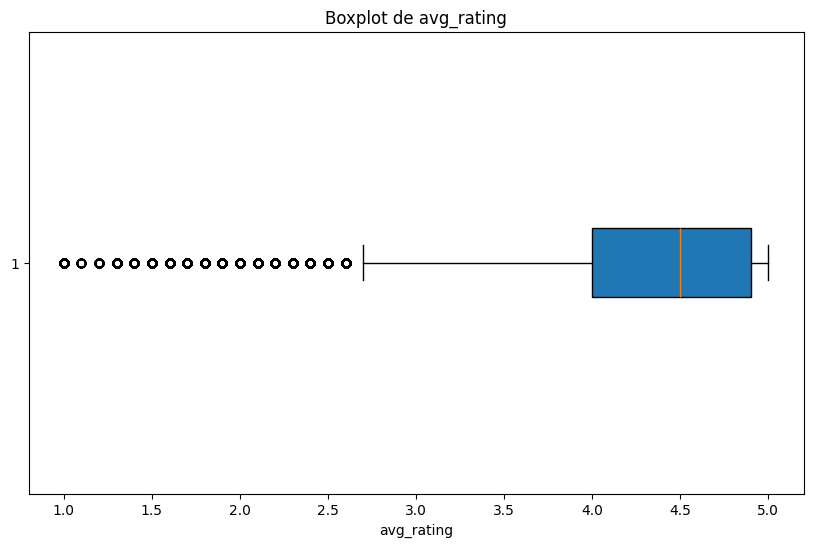

In [32]:
# Crear el boxplot para visualizar los outliers
plt.figure(figsize=(10, 6))  # Crear una nueva figura con tamaño específico
plt.boxplot(df['avg_rating'].dropna(), vert=False, patch_artist=True)  # Crear el boxplot
plt.title('Boxplot de avg_rating')  # Título del gráfico
plt.xlabel('avg_rating')  # Etiqueta del eje X
plt.show()  # Mostrar el gráfico

La mayoría de los ítems (probablemente productos o servicios) reciben calificaciones promedio bastante positivas, con la mayor parte entre 3.8 y 4.5.
Hay una cantidad significativa de outliers con calificaciones bajas, lo que podría indicar algunos ítems problemáticos o experiencias negativas consistentes para ciertos productos/servicios.
La asimetría sugiere que es más común ver calificaciones muy bajas que calificaciones perfectas de 5.0.
La concentración de calificaciones en el rango alto podría indicar una tendencia general de satisfacción del usuario o posiblemente un sesgo positivo en el sistema de calificación.

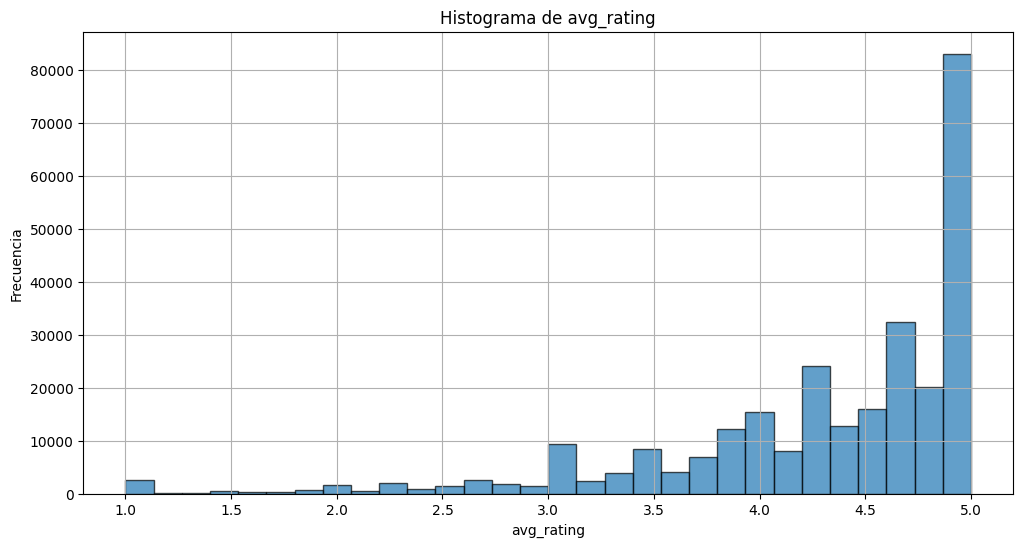

In [34]:
# Crear histograma para `avg_rating`
plt.figure(figsize=(12, 6))
plt.hist(df['avg_rating'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title('Histograma de avg_rating')
plt.xlabel('avg_rating')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

La alta concentración de calificaciones de 5 estrellas podría indicar una tendencia de los usuarios a dar calificaciones perfectas con frecuencia, posiblemente inflando las calificaciones generales.
El sesgo hacia calificaciones altas podría deberse a varios factores:

Satisfacción general alta con los productos/servicios.
Tendencia de los usuarios satisfechos a dejar más reseñas que los insatisfechos.
Posible sesgo de selección donde los usuarios compran productos que esperan les gusten.
Posible presencia de reseñas falsas o incentivadas que tienden a ser muy positivas.


La relativamente baja frecuencia de calificaciones medias (2.5-3.5) sugiere que los usuarios tienden a tener opiniones más polarizadas.
El pequeño pico en 1.0 podría representar usuarios muy insatisfechos o productos problemáticos.
La granularidad observada en valores enteros y medios sugiere que muchos usuarios simplifican sus calificaciones, lo que podría afectar la precisión de las calificaciones promedio.

In [25]:
# Aplicar la función a `num_of_reviews`
num_of_reviews_outliers = calculate_outliers_iqr(df['num_of_reviews'])
print("Outliers en num_of_reviews:")
print(num_of_reviews_outliers)


Outliers en num_of_reviews:
6          88
7          68
20         58
31         58
41         58
         ... 
274917     58
274926    108
274960     56
274965     98
274998    188
Name: num_of_reviews, Length: 23919, dtype: int64


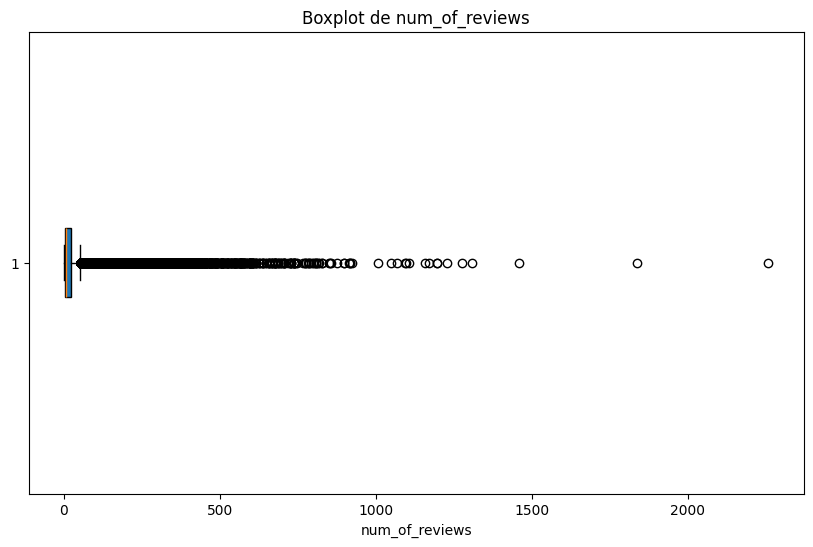

In [33]:
# Crear el boxplot para visualizar los outliers
plt.figure(figsize=(10, 6))  # Crear una nueva figura con tamaño específico
plt.boxplot(df['num_of_reviews'].dropna(), vert=False, patch_artist=True)  # Crear el boxplot
plt.title('Boxplot de num_of_reviews')  # Título del gráfico
plt.xlabel('num_of_reviews')  # Etiqueta del eje X
plt.show()  # Mostrar el gráfico

La gran mayoría de los elementos (probablemente productos o servicios) tienen muy pocas reseñas. Esto podría indicar que muchos productos son nuevos, poco populares, o que los usuarios no tienden a dejar reseñas con frecuencia.
Hay un pequeño número de elementos "superestrellas" que han acumulado un número excepcionalmente alto de reseñas. Estos podrían ser productos muy populares, best-sellers, o elementos que han estado en el mercado por mucho tiempo.
La distribución sugiere una "economía de los superestrellas" donde unos pocos productos acaparan la mayoría de la atención y las reseñas, mientras que la gran mayoría recibe poca atención.
Esta distribución podría afectar la confiabilidad de las calificaciones promedio, ya que muchos productos tienen muy pocas reseñas para ser estadísticamente significativas.
Para análisis futuros, podría ser útil considerar separadamente los productos con un número significativo de reseñas de aquellos con muy pocas.
Desde una perspectiva de negocio, esto podría indicar oportunidades para fomentar más reseñas en la mayoría de los productos, o para entender qué hace que ciertos productos obtengan tantas reseñas.

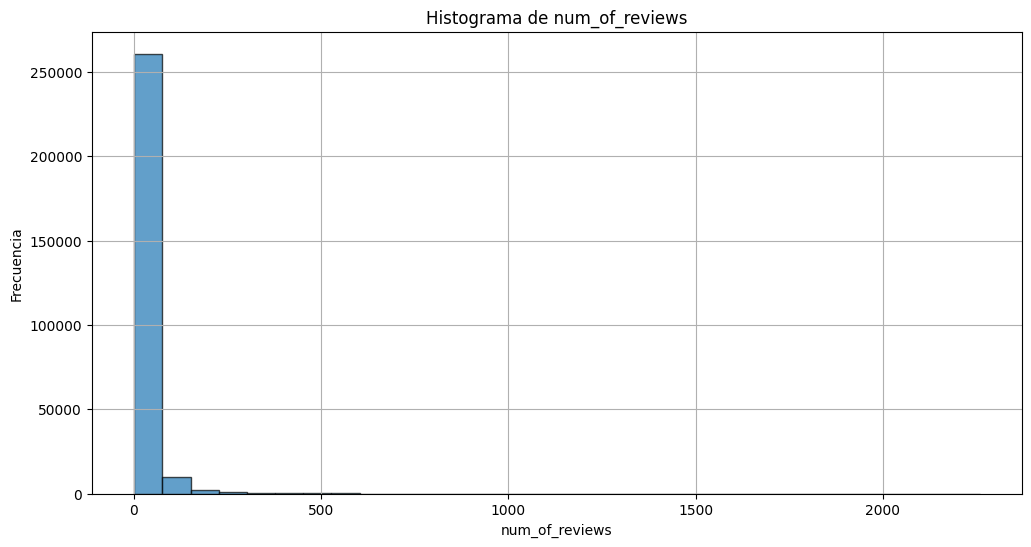

In [36]:
# Crear histograma para `num_of_reviews`
plt.figure(figsize=(12, 6))
plt.hist(df['num_of_reviews'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title('Histograma de num_of_reviews')
plt.xlabel('num_of_reviews')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

La gran mayoría de los elementos (productos/servicios) tienen muy pocas reseñas, posiblemente incluso cero. Esto podría indicar:
a) Muchos productos nuevos o poco conocidos en el catálogo.
b) Baja participación de los usuarios en dejar reseñas para la mayoría de los productos.
c) Un catálogo muy extenso con muchos productos de nicho.
Solo una pequeña fracción de los elementos recibe un número significativo de reseñas. Estos podrían ser:
a) Productos muy populares o best-sellers.
b) Productos que han estado en el mercado por mucho tiempo.
c) Productos que por alguna razón generan más engagement de los usuarios.
Esta distribución plantea desafíos para la interpretación de las calificaciones promedio:
a) Para la mayoría de los productos, las calificaciones promedio podrían no ser estadísticamente significativas debido al bajo número de reseñas.
b) Los productos con muchas reseñas podrían dominar las métricas generales del sistema.
Implicaciones para el negocio:

................................Necesidad de estrategias para incentivar más reseñas en la mayoría de los productos.
Posible revisión de la visibilidad o relevancia de productos con pocas o ninguna reseña.
Considerar ponderaciones o ajustes en los sistemas de recomendación para no favorecer excesivamente a los productos con muchas reseñas.
Investigar qué factores contribuyen a que ciertos productos obtengan muchas más reseñas que otros.